In [2]:
import numpy as np
import scipy
import scipy.stats
import scipy.optimize

In [55]:
# the function in question
f = lambda x : x[0] - x[1] + 2*x[0]**2 + 2*x[0]*x[1] + x[1]**2

# scipy's best guess at f's global minimum (BFGS method)
xmin = scipy.optimize.minimize(f, [0, 0]).x
print(xmin, f(xmin))

[-1.          1.49999999] -1.25


In [56]:
### NEWTON'S METHOD ###

def newton_step (f, grad_f, Hinv, x_old) :
    
    # compute search direction
    d = - np.dot(Hinv, grad_f(x_old))
    
    # minimize f(x_old + alpha * d) w.r.t. alpha
    alpha = 1
#     g = lambda alpha, x, d : f(x + alpha * d)
#     alpha = scipy.optimize.minimize(g, 1, args=(x_old,d)).x
    
    # take a step
    return x_old + alpha * d

In [57]:
### SETUP ###


# the function in question
f = lambda x : x[0] - x[1] + 2*x[0]**2 + 2*x[0]*x[1] + x[1]**2
# gradient of f
grad_f = lambda x : [1 + 4 * x[0] + 2 * x[1], -1 + 2*x[0] + 4*x[1]]
# hessian of f (constant, independent of xi)
H = np.array([[4, 2],[2, 4]])
# invert the hessian
Hinv = np.linalg.inv(H)


### TESTING


# start point
x1 = [0, 0]

# take one step of newton's method
x2 = newton_step(f, grad_f, Hinv, x1)
print(x2)

[-0.5  0.5]


<IPython.core.display.Javascript object>


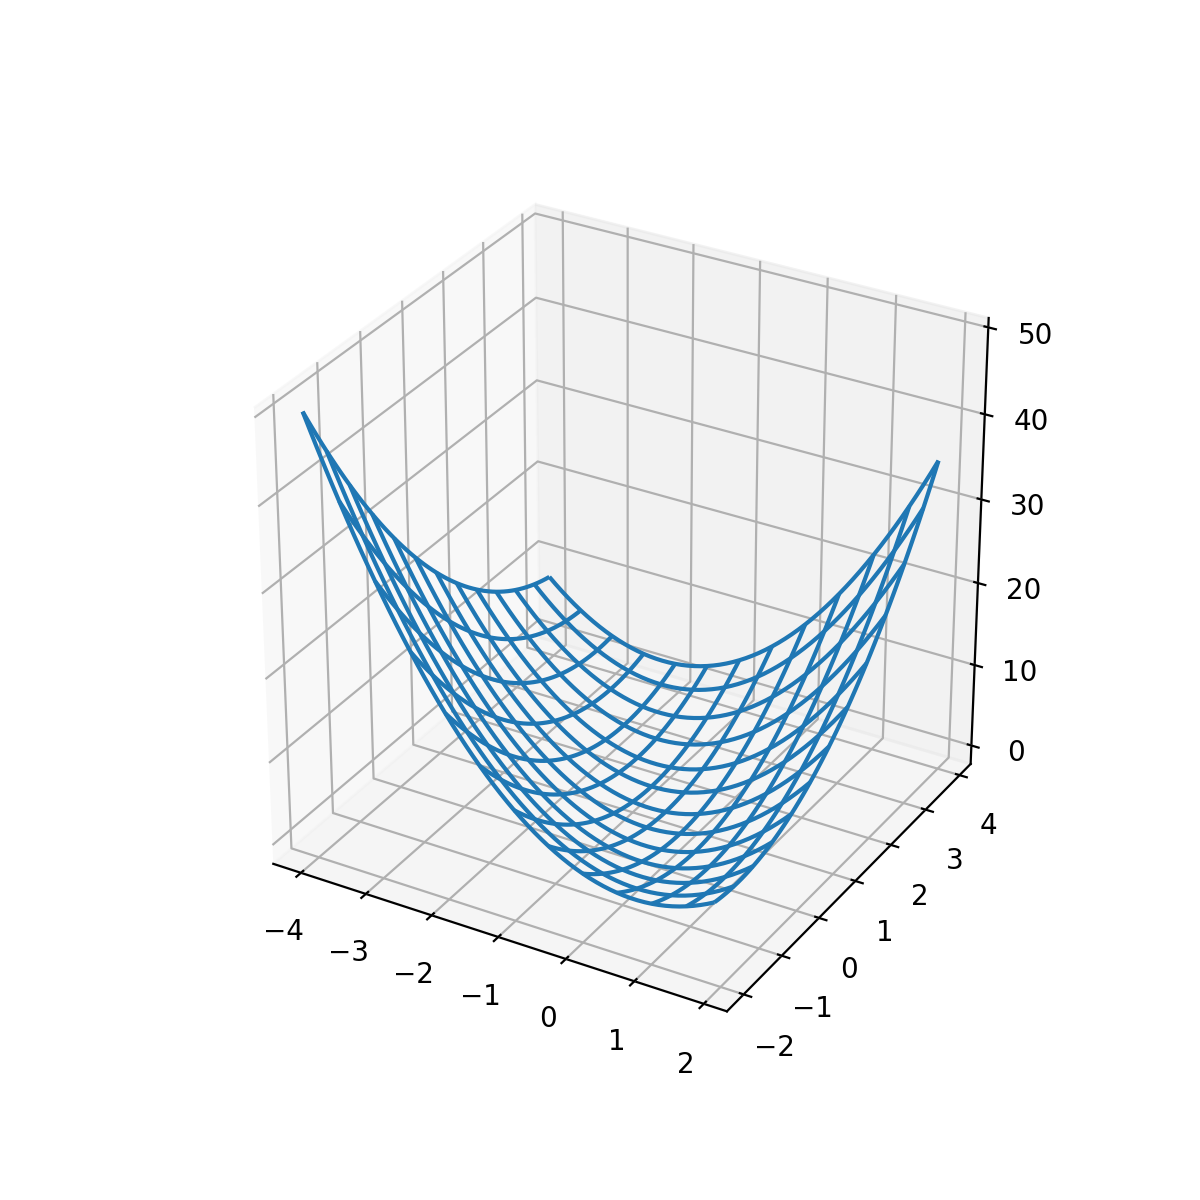

In [8]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
x = np.arange(-4,2,0.1)
y = np.arange(-2,4,0.1)
X,Y = np.meshgrid(x,y)
Z = f([X,Y])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

plt.show()